In [1]:
import csv
import os
import subprocess
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
# partial user list, acquired from /etc/passwd
home_list = subprocess.check_output(['ls', '/home']).decode('utf-8').strip().split('\n')
passwd_list = subprocess.check_output(['cat', '/etc/passwd']).decode('utf-8').strip().split('\n')
users_frame_palmetto = pd.DataFrame()

list_ = []
for entry in passwd_list:
    tmp_ = entry.split(':')
    if tmp_[0] in home_list:
        list_.append([tmp_[0],tmp_[4]])
        
users_frame_palmetto = pd.DataFrame(list_,columns=['userID','FullName'])
print(users_frame_palmetto)

          userID                        FullName
0         nagios      Palmetto Nagios Monitoring
1         flexlm                  Flexlm Manager
2        myricom                 Myricom Support
3             nx                NX Software CUGI
4        unbound                                
5           wolf                  Randall Martin
6         coreyf                   Corey Ferrier
7          pepin                     JAMES PEPIN
8        joehsen                 Barr von Oehsen
9         eduffy                    Edward Duffy
10           mjs                Matthew Saltzman
11       gemmill                    Jill Gemmill
12        dominy                    Brian Dominy
13           pww                     PAUL WILSON
14       latourr                   Robert Latour
15        yangli                         YANG LI
16         mikec                  Michael Cannon
17       mtpowel                  Matthew Powell
18    haiyongliu                     THOMAS MROZ
19        elaine    

In [3]:
print(list_)

[['nagios', 'Palmetto Nagios Monitoring'], ['flexlm', 'Flexlm Manager'], ['myricom', 'Myricom Support'], ['nx', 'NX Software CUGI'], ['unbound', ''], ['wolf', 'Randall Martin'], ['coreyf', 'Corey Ferrier'], ['pepin', 'JAMES PEPIN'], ['joehsen', 'Barr von Oehsen'], ['eduffy', 'Edward Duffy'], ['mjs', 'Matthew Saltzman'], ['gemmill', 'Jill Gemmill'], ['dominy', 'Brian Dominy'], ['pww', 'PAUL WILSON'], ['latourr', 'Robert Latour'], ['yangli', 'YANG LI'], ['mikec', 'Michael Cannon'], ['mtpowel', 'Matthew Powell'], ['haiyongliu', 'THOMAS MROZ'], ['elaine', 'Elaine Quarles'], ['xfeng', 'XIANFENG LI'], ['lmark', 'Mark Leising'], ['mbradle', 'Bradley Meyer'], ['tlihsin', 'Lihsin The'], ['smoysey', 'Stephen Moysey'], ['walt', 'Walt Ligon'], ['dbruce', 'David Bruce'], ['condor', 'Condor User'], ['vblouin', 'VINCENT BLOUIN'], ['kgasic', 'Ksenija Gasic'], ['smaskey', 'Sabina Maskey'], ['dperahi', 'Dvora Perahia'], ['jjoyner', 'Jason Joyner'], ['warner', 'Daniel Warner'], ['mkurz', 'Mary Beth Kurz'

In [14]:
# full user list, from Marcin's records
# This does not work well because full name: i.e: Alex Feltus (publication) versus Alexander Feltus (users.csv) 
users_frame_file = pd.DataFrame()
userFile = 'palmetto_data/Users.csv'

list_ = []
with open(userFile, mode = 'r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    for row in reader:
        list_.append(row)
users_frame_file = pd.DataFrame(list_,columns=['LocalUserId', 'FullName', 'Rank', 'Title', 'Major', 'Department', 'College'])

[['chinthk', 'KURUWITA CHINTHAKA NILANGA', '3', '28', 'NULL', '4', '65'], ['mbhuiya', 'BHUIYAN MOHAMMAD ASHRAF UDDIN', '1', '1', '3', '3', '64'], ['asfowle', 'FOWLER ANDREW SCOTT', '1', '2', '2', '2', '64'], ['rghill', 'HILL RYAN GREGORY', '1', '1', '4', '4', '65'], ['truptip', 'PATIL TRUPTI', '1', '1', '8', '3', '64'], ['jyancey', 'YANCEY JEREMY A', '2', '13', 'NULL', '18', '64'], ['dorothj', 'CANFIELD-JOHNSTON DOROTHY', '3', '29', 'NULL', '23', '3'], ['cherran', 'HERRAN CHRISTY LEIGH', '1', '1', '5', '5', '64'], ['coreyf', 'FERRIER COREY LEE', '3', '21', 'NULL', '23', '3'], ['bcousin', 'COUSINS BENJAMIN RUSSELL', '1', '2', '4', '4', '65'], ['smgibso', 'GIBSON SCOTT MICHAEL', '1', '1', '3', '3', '64'], ['dnugawe', 'NUGAWELA DULMA ERANGI', '1', '1', '1', '1', '65'], ['amangip', 'MANGIPUDI ADITYA KIRAN RAMA SUBRAHAMAN', '1', '1', '3', '3', '64'], ['jliskow', 'LISKOWSKY JOSEPH PAUL', '1', '1', '12', '15', '65'], ['ddickel', 'DICKEL DOYL EDWARD', '1', '1', '12', '15', '65'], ['phe', 'HE P

In [4]:
# combine lists, from both /etc/passwd and Users.csv
userName = {}
for index, row in users_frame_palmetto.iterrows():
    try:
        fullName = row['FullName'].split(' ')
        fullName = [x.strip() for x in fullName]
        fullName = [x.lower() for x in fullName]
        lastName = fullName[len(fullName) - 1]
        if (lastName not in userName):
            userName[lastName] = {}
            userName[lastName]['0'] = fullName[:(len(fullName) - 1)]
        else:
            userName[lastName][str(len(userName[lastName]))] = fullName[:(len(fullName) - 1)]
    except AttributeError:
        continue
        
for index, row in users_frame_file.iterrows():
    try:
        fullName = row['FullName'].split(' ')
        fullName = [x.strip() for x in fullName]
        fullName = [x.lower() for x in fullName]
        lastName = fullName[len(fullName) - 1]
        if (lastName not in userName):
            userName[lastName] = {}
            userName[lastName]['0'] = fullName[:(len(fullName) - 1)]
        else:
            userName[lastName][str(len(userName[lastName]))] = fullName[:(len(fullName) - 1)]
    except AttributeError:
        continue
#print (userName)

In [5]:
allFiles = glob.glob('publications' + '/*.txt')
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_table(file_,index_col=None, header=0, delimiter='\t')
    list_.append(df)
frame = pd.concat(list_)
print (frame.shape)

colnames = frame.columns.values.tolist()
print (colnames)

(16246, 56)
['\ufeffPT', 'AU', 'BA', 'CA', 'GP', 'RI', 'OI', 'BE', 'Z2', 'TI', 'X1', 'Y1', 'Z1', 'FT', 'PN', 'AE', 'Z3', 'SO', 'S1', 'SE', 'BS', 'VL', 'IS', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'SU', 'PD', 'PY', 'AB', 'X4', 'Y4', 'Z4', 'AK', 'CT', 'CY', 'SP', 'CL', 'TC', 'Z8', 'ZR', 'ZB', 'ZS', 'Z9', 'U1', 'U2', 'SN', 'EI', 'BN', 'UT', 'PM', 'Unnamed: 55']


In [6]:
# check if any author has more than three phrases for full name in publication:
'''
for index, row in frame.iterrows():
    try:
        authors_list = row['AU'].split(';')
        for author in authors_list:
            publicationName = author.split(',')
            publicationName = [x.strip().lower for x in publicationName]
            if (len(publicationName) > 2):
                print (index, author)
    except AttributeError:
        continue
'''

"\nfor index, row in frame.iterrows():\n    try:\n        authors_list = row['AU'].split(';')\n        for author in authors_list:\n            publicationName = author.split(',')\n            publicationName = [x.strip().lower for x in publicationName]\n            if (len(publicationName) > 2):\n                print (index, author)\n    except AttributeError:\n        continue\n"

In [7]:
# Plot number of publications per year
years = list(set(frame['PY']))
years.sort()
print (years)

keyword_list = ['computation', 'compute', 'simulation', 'computational', 'simulate', 'genome',
               'sequence', 'sequencing', 'molecule', 'large scale', 'large-scale', 'massive', 
                'hpc', 'molecular', 'simulations', 'genomic']

keyword_counts = pd.Series(np.zeros(len(years)), index=years)

all_publications = pd.Series(np.zeros(len(years)), index=years)
one_publications = pd.Series(np.zeros(len(years)), index=years)
multi_publications = pd.Series(np.zeros(len(years)), index=years)

for index, row in frame.iterrows():
    authorCount = 0
    all_publications.loc[row['PY']] += 1.0
    try:
        authors_list = row['AU'].split(';')
        for author in authors_list:
            authorName = author.split(',')
            authorName = [x.strip().lower() for x in authorName]
            if (authorName[0] in userName):
                try:
                    authorFirstName = authorName[1].split(' ')
                except IndexError:
                    print ("Error: ", authorName)
                for key in userName[authorName[0]]:
                    if (authorFirstName[0] in userName[authorName[0]][key]):
                        #print (authorName, " = ", userName[authorName[0]][key], index)
                        authorCount += 1                      
    except AttributeError:
        continue
    if (authorCount > 0):
        one_publications.loc[row['PY']] += 1.0
        try:
            abstract_words = row['AB'].split(' ')
            abstract_words = [x.strip().lower() for x in abstract_words]
            for word in keyword_list:
                if word in abstract_words:
                    keyword_counts.loc[row['PY']] += 1.0
                    break
        except AttributeError:
            continue
    if (authorCount > 1):
        multi_publications.loc[row['PY']] += 1.0


[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Error:  ['ke']


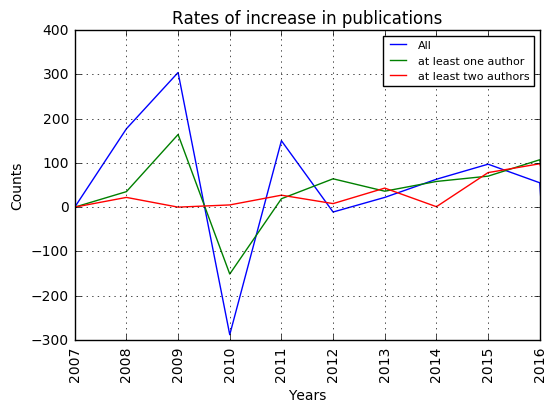

In [8]:
%matplotlib inline

all_growth = pd.Series(np.zeros(len(years)), index=years)
one_growth = pd.Series(np.zeros(len(years)), index=years)
multi_growth = pd.Series(np.zeros(len(years)), index=years)

for i in range(1, len(years)):
    all_growth.iloc[i] = all_publications.iloc[i] - all_publications.iloc[i-1]
    one_growth.iloc[i] = one_publications.iloc[i] - one_publications.iloc[i-1]
    multi_growth.iloc[i] = multi_publications.iloc[i] - multi_publications.iloc[i-1]
    
xlab = [str(x) for x in years]

plt.plot(all_growth)
plt.plot(one_growth)
plt.plot(multi_growth)
plt.xticks(years, xlab, rotation='vertical')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.title('Rates of increase in publications')
plt.axis([2007, 2016, -300, 400])
plt.grid(True)
plt.legend(['All', 'at least one author', 'at least two authors'], loc='upper right', fontsize=8)
plt.show()

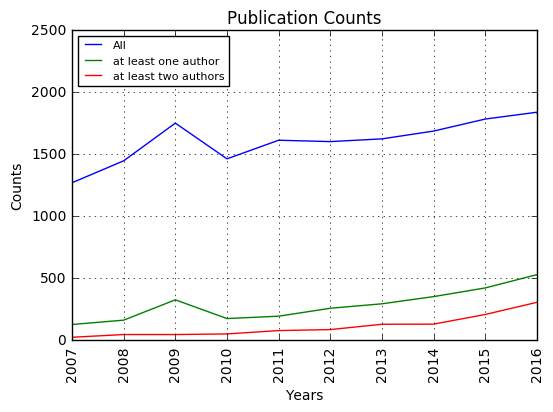

In [9]:
%matplotlib inline

xlab = [str(x) for x in years]

plt.plot(all_publications[0:11])
plt.plot(one_publications[0:11])
plt.plot(multi_publications[0:11])
plt.xticks(years, xlab, rotation='vertical')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.title('Publication Counts')
plt.axis([2007, 2016, 0, 2500])
plt.grid(True)
plt.legend(['All', 'at least one author', 'at least two authors'], loc='upper left', fontsize=8)
plt.show()

In [10]:
print(all_publications)
print(one_publications)
print(multi_publications)
print(keyword_counts)

2007    1268.0
2008    1445.0
2009    1749.0
2010    1461.0
2011    1611.0
2012    1600.0
2013    1622.0
2014    1685.0
2015    1782.0
2016    1837.0
2017     186.0
dtype: float64
2007    125.0
2008    160.0
2009    324.0
2010    173.0
2011    192.0
2012    256.0
2013    292.0
2014    350.0
2015    420.0
2016    527.0
2017     47.0
dtype: float64
2007     22.0
2008     44.0
2009     44.0
2010     49.0
2011     76.0
2012     84.0
2013    127.0
2014    128.0
2015    206.0
2016    304.0
2017     30.0
dtype: float64
2007     25.0
2008     46.0
2009     47.0
2010     61.0
2011     66.0
2012     68.0
2013    102.0
2014     99.0
2015    152.0
2016    157.0
2017     14.0
dtype: float64


In [11]:
print (one_publications/all_publications)
print (multi_publications/all_publications)

2007    0.098580
2008    0.110727
2009    0.185249
2010    0.118412
2011    0.119181
2012    0.160000
2013    0.180025
2014    0.207715
2015    0.235690
2016    0.286881
2017    0.252688
dtype: float64
2007    0.017350
2008    0.030450
2009    0.025157
2010    0.033539
2011    0.047176
2012    0.052500
2013    0.078298
2014    0.075964
2015    0.115600
2016    0.165487
2017    0.161290
dtype: float64


In [12]:
!cat /etc/passwd

root:x:0:0:root:/root:/bin/bash
bin:x:1:1:bin:/bin:/sbin/nologin
daemon:x:2:2:daemon:/sbin:/sbin/nologin
adm:x:3:4:adm:/var/adm:/sbin/nologin
sys:x:3:3::/:/sbin/nologin
noaccess:x:60002:60002:No Access User:/:/sbin/nologin
lp:x:4:7:lp:/var/spool/lpd:/sbin/nologin
sync:x:5:0:sync:/sbin:/bin/sync
shutdown:x:6:0:shutdown:/sbin:/sbin/shutdown
halt:x:7:0:halt:/sbin:/sbin/halt
mail:x:8:12:mail:/var/spool/mail:/sbin/nologin
news:x:9:13:news:/etc/news:
uucp:x:10:14:uucp:/var/spool/uucp:/sbin/nologin
operator:x:11:0:operator:/root:/sbin/nologin
games:x:12:100:games:/usr/games:/sbin/nologin
gopher:x:13:30:gopher:/var/gopher:/sbin/nologin
ftp:x:14:50:FTP User:/install:/sbin/nologin
nuucp:x:9:9:uucp Admin:/var/spool/uucppublic:/usr/lib/uucp/uucico
dladm:x:15:65:Datalink Admin:/:
netadm:x:16:65:Network Admin:/:
netcfg:x:17:65:Network Configuration Admin:/:
dhcpserv:x:18:65:DHCP Configuration Admin:/:
upnp:x:52:52:UPnP Server Reserved UID:/var/coherence:/bin/ksh
xvm:x:60:60:xVM User:/:
aiuser:x:61:6